#### VI
1. 状態価値関数と動的計画法
    1. 動的計画法とはなにか？
        動的計画法とは、大きな問題を少ない問題に分割して解いていく方法です。たとえば、迷路だと、ゴールからスタートして、その前のマスだけに注目して問題を時、その次にその前のマスだけに...というふうに問題を解いていきます。

    2.  状態価値関数とベルマン方程式
        状態価値関数は、ある任意の状態sについて、期待報酬の総和を返す関数です。MDPの中で、最適な価値関数を**最適状態価値関数**  といい、以下のように表します。

        V*(s) = max a in A {g(s,a) + gamma...}
        
        上の式のように最適状態価値関数を表現する方程式を**ベルマン方程式**といいます。ただ、最初から最適状態価値関数は求められているわけではありませんし、求まっていたら、解く意味がありません。そこで、ある状態ｓについて、実数を返す状態関数を考えましょう。

        v(s) s in S -> R

        次に、状態関数に適用していく作用素を定義します。この作用素を繰り返し適用することで状態関数が最適状態価値関数に収束します。(証明は後ろ)

        (B*v(s)) = 

        ベルマン最適作用素と名前をつけます。


    3. 動的計画法を用いた状態価値関数の求め方(VI)

        ベルマン最適作用素を繰り返し適用して最適状態価値関数を求めていきましょう。
        ここでは以下のコードに従って実装していきます。


4. 実装

教科書に書かれている例題を解くコードを実装しましょう。syuntoku14さんのコードを参考に、最適状態価値関数を求めるコードを実装します。

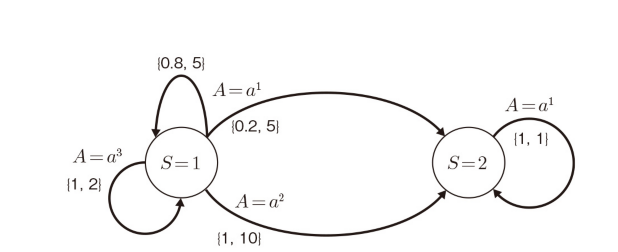



In [2]:
#5種類くらい環境作って実験
import numpy as np
import random
from typing import NamedTuple


S = 2
A = 3
S_set = np.arange(S)
A_set = np.arange(A)
gamma = 0.9

#例1.5準拠
#g(s,a)
g = np.zeros((S,A))
g[0][0] = 5
g[0][1] = 10
g[0][2] = 2
g[1][0] = 1


#P(s'|s,a)
P = np.zeros((S,S,A))
P[0][0][0] = 0.8
P[1][0][0] = 0.2
P[1][0][1] = 1
P[0][0][2] = 1
P[1][1][0] = 1
P = np.transpose(P, (1, 2, 0))


class MDP(NamedTuple):
    S_set: np.array  # 状態集合
    A_set: np.array  # 行動集合
    gamma: float  # 割引率
    g: np.array  # 報酬行列
    P: np.array  # 遷移確率行列

    @property
    def S(self) -> int:  # 状態空間のサイズ
        return len(self.S_set)

    @property
    def A(self) -> int:  # 行動空間のサイズ
        return len(self.A_set)


mdp = MDP(S_set, A_set, gamma, g, P)
print(mdp.g.shape)
print(mdp.P.shape)

s = 1
a = 1
next_s = 1

# "$Pr(S_{t+1}=s'\|S_t=s, A_t=a)$と同じ意味です
print(mdp.P[s, a, next_s])

# 実際ちゃんと確率になっいます："$\sum_{s' \in S} Pr(S_{t+1}=s'\|S_t=s, A_t=a) = 1$です
print(mdp.P[s, a].sum())

(2, 3)
(2, 3, 2)
0.0
0.0


In [14]:
# ベルマン最適作用素です
def Bellman_optimal_operator(mdp, v):
    S,A = mdp.S, mdp.A
    P_v = P @ v
    
    #S*Aの行列になる。
    state_value = g + mdp.gamma * P_v
    #S列で最大の値を。
    return(state_value.max(axis = 1))

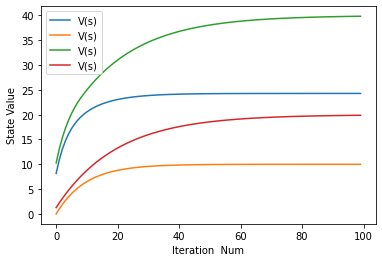

In [27]:
import matplotlib.pyplot as plt

# ベルマン最適作用素の実験
S, A = mdp.S, mdp.A

gammas = [0.9, 0.95]
for gamma in gammas:
    v_before = np.random.randn(S)  
    v_value = []

    mdp = mdp._replace(gamma=gamma)
    # ベルマン最適作用素を繰り返し適用して、収束するか確認してみます
    for i in range(100):
        v_after = Bellman_optimal_operator(mdp, v_before)
        errors.append(np.abs(v_after - v_before).max())
        v_before = v_after
        v_value.append(v_after)
    plt.plot(v_value, label="V(s)")
    #plt.plot(errors, label=r"$\gamma=$" + f"{gamma}")

plt.ylabel("State Value")
plt.xlabel("Iteration  Num")

plt.legend()

上2つはγが0.95の場合です。下2つのグラフがγが0.90の場合、\
教科書内の図と一致していることが分かると思います

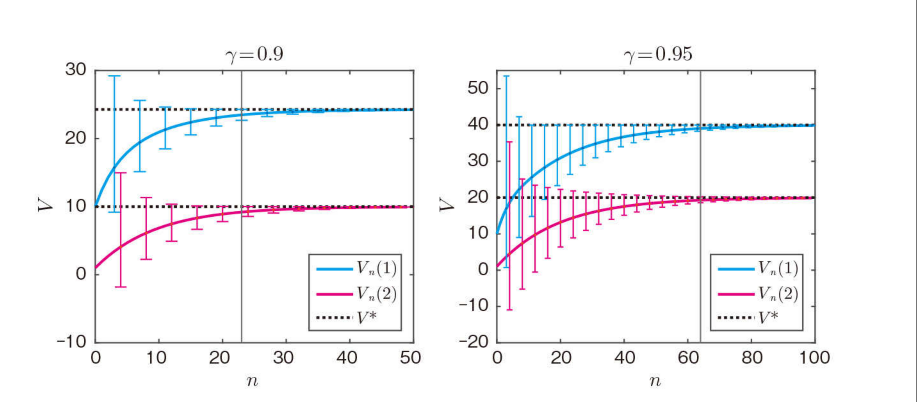


2.  状態価値関数から行動価値関数へ
    1.  行動価値関数とは？
        行動価値関数とは、ある状態における行動を選んだ際の期待報酬の総和を返す関数です。

    2.  行動価値関数と状態価値関数のつながり
        以下のイメージを見ていだければ、つながりが解ると思います。
        
        QπとVπの関係

        Q*とV*の関係




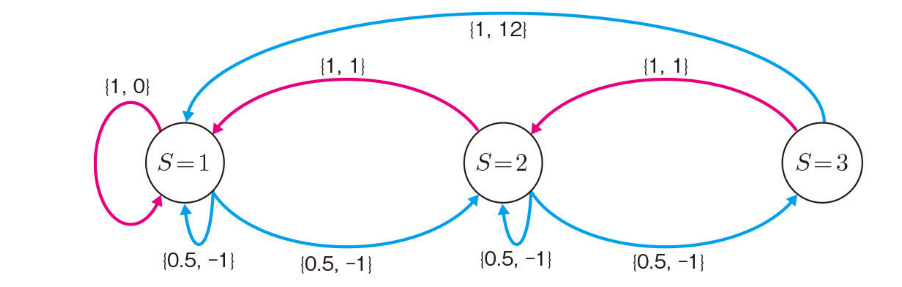

In [9]:
class MDP_Env():

    def __init__(self):
        S = 3
        A = 2
        
    def step(self,state,action):
        if(state == '1'):
            if(action =='a1'):
                next_state = '1'
                reward = 0
            elif(action =='a2'):
                prob = random.randint(0,9)
                if(prob >= 4):
                    next_state = '1'
                    reward = -1
                else:
                    next_state = '2'
                    reward = -1    
        elif(state == '2'):
            if(action=='a1'):
                next_state = '1'
                reward = 1
            elif(action =='a2'):
                prob = random.randint(0,9)
                if(prob >= 4):
                    next_state = '2'
                    reward = -1
                else:
                    next_state = '3'
                    reward = -1    
        elif(state == '3'):
            if(action=='a1'):
                next_state = '2'
                reward = 1
            elif(action =='a2'):
                next_state = '1'
                reward = 12
        return next_state,reward

env = MDP_Env()

In [ ]:
####Q学習の実装